<a href="https://colab.research.google.com/github/phong516/AI_Course/blob/main/homeworkFuzzy/rainPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 50.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e18ed262fe8eebafe7ac51a6f111be7f6fdfdb50ef8d0a4e1621f0a5f07c30af
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

0.560344827586207


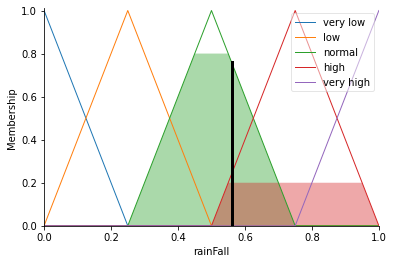

In [10]:
xAxis = np.arange(0.0, 1.01, 0.01)

temperature = ctrl.Antecedent(xAxis,'temperature') 
temperature.automf(5, names = ['very low', 'low', 'normal', 'high', 'very high'])

windSpeed = ctrl.Antecedent(xAxis,'windSpeed')
windSpeed.automf(5, names = ['very low', 'low', 'normal', 'high', 'very high'])

rainFall = ctrl.Consequent(xAxis, 'rainFall')
rainFall.automf(5, names = ['very low', 'low', 'normal', 'high', 'very high'])

'''temperature.view()
windSpeed.view()
rainFall.view()'''

rule1 = ctrl.Rule(windSpeed['very low'] & temperature['very low'], rainFall['very low'])                             
rule2 = ctrl.Rule(windSpeed['very low'] & temperature['low'], rainFall['very low'])
rule3 = ctrl.Rule(windSpeed['very low'] & temperature['normal'], rainFall['low'])
rule4 = ctrl.Rule(windSpeed['very low'] & temperature['high'], rainFall['low'])
rule5 = ctrl.Rule(windSpeed['very low'] & temperature['very high'], rainFall['low'])

rule6 = ctrl.Rule(windSpeed['low'] & temperature['very low'], rainFall['very low'])                                        
rule7 = ctrl.Rule(windSpeed['low'] & temperature['low'], rainFall['very low'])                                    
rule8 = ctrl.Rule(windSpeed['low'] & temperature['normal'], rainFall['low'])
rule9 = ctrl.Rule(windSpeed['low'] & temperature['high'], rainFall['low'])
rule10 = ctrl.Rule(windSpeed['low'] & temperature['very high'], rainFall['normal'])

rule11 = ctrl.Rule(windSpeed['normal'] & temperature['very low'], rainFall['very low'])
rule12 = ctrl.Rule(windSpeed['normal'] & temperature['low'], rainFall['low'])
rule13 = ctrl.Rule(windSpeed['normal'] & temperature['normal'], rainFall['normal'])
rule14 = ctrl.Rule(windSpeed['normal'] & temperature['high'], rainFall['normal'])
rule15 = ctrl.Rule(windSpeed['normal'] & temperature['very high'], rainFall['high'])

rule16 = ctrl.Rule(windSpeed['high'] & temperature['very low'], rainFall['low'])
rule17 = ctrl.Rule(windSpeed['high'] & temperature['low'], rainFall['normal'])
rule18 = ctrl.Rule(windSpeed['high'] & temperature['normal'], rainFall['normal'])
rule19 = ctrl.Rule(windSpeed['high'] & temperature['high'], rainFall['high'])
rule20 = ctrl.Rule(windSpeed['high'] & temperature['very high'], rainFall['high'])                                       

rule21 = ctrl.Rule(windSpeed['very high'] & temperature['very low'], rainFall['normal'])
rule22 = ctrl.Rule(windSpeed['very high'] & temperature['low'], rainFall['normal'])
rule23 = ctrl.Rule(windSpeed['very high'] & temperature['normal'], rainFall['high'])                                    
rule24 = ctrl.Rule(windSpeed['very high'] & temperature['high'], rainFall['very high'])
rule25 = ctrl.Rule(windSpeed['very high'] & temperature['very high'], rainFall['very high'])                             

rule = []
for i in range(1, 26):
  rule.append(locals()["rule" + str(i)])


rain_ctrl = ctrl.ControlSystem(rule)
rainSimu = ctrl.ControlSystemSimulation(rain_ctrl)

rainSimu.input['temperature'] = 0.5
rainSimu.input['windSpeed'] = 0.8

rainSimu.compute()
print(rainSimu.output['rainFall'])
rainFall.view(sim=rainSimu)
